### Séries temporais

---



Dados de séries temporais são uma forma importante de dados
estruturados em muitas áreas diferentes como finanças, economia,
ecologia, neurociência e física. Quaisquer dados observados ou
medidos em vários pontos no tempo compõem uma série temporal.
Muitas séries temporais têm *frequência fixa*, o que equivale a dizer que
os pontos de dados ocorrem a intervalos regulares de acordo com
alguma regra, por exemplo, a cada 15 segundos, a cada 5 minutos
ou uma vez por mês. As séries temporais também podem ser
*irregulares*, sem uma unidade de tempo fixa ou um offset
(deslocamento) entre as unidades. O modo como marcamos e
referenciamos os dados de séries temporais depende da aplicação,
e podemos ter um dos seguintes casos:

- *Timestamps*, que são instantes específicos no tempo.
- *Períodos* fixos, por exemplo, o mês de janeiro de 2007 ou o ano
todo de 2010.
- *Intervalos* de tempo, representados por um timestamp de início e
de fim. Podemos pensar nos períodos como casos especiais de
intervalos.
- Tempo do experimento ou tempo decorrido; cada timestamp é
uma medida de tempo relativa a um determinado instante de
início (por exemplo, o diâmetro de um biscoito que assa a cada
segundo desde que foi colocado no forno).



### Tipos de dados e ferramentas para data e hora
A biblioteca-padrão de Python inclui tipos de dados para datas e
horas, assim como funcionalidades relacionadas ao calendário. Os
módulos *datetime*, *time* e *calendar* são os principais locais para
começar. O tipo *datetime.datetime*, ou apenas *datetime*, é amplamente
utilizado:

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
now = datetime.now()
now

datetime.datetime(2021, 5, 21, 0, 12, 1, 626030)

In [3]:
print(now.year, now.month, now.day)

2021 5 21


*datetime* armazena tanto a data quanto a hora, até o nível de
microssegundos. *timedelta* representa a diferença de tempo entre
dois objetos *datetime*:

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

Podemos somar um *timedelta* ou um múltiplo dele a um objeto *datetime*
(ou subtrair desse objeto), o que resultará em um novo objeto
deslocado:

In [7]:
from datetime import timedelta

In [8]:
start = datetime(2011, 1, 7)

In [9]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Tabela – Tipos no módulo datetime

Tipo | Descrição
-----|-------------
**date** | Armazena uma data de calendário (ano, mês, dia) usando o calendário
|gregoriano
**time** | Armazena a hora do dia na forma de horas, minutos, segundos e
|microssegundos
**datetime** | Armazena tanto a data quanto a hora
**timedelta** | Representa a diferença entre dois valores de datetime (como dias,
|segundos e microssegundos)
**tzinfo** | Tipo-base para armazenar informações de fuso horário

### Conversão entre string e datetime

Podemos formatar objetos *datetime* e objetos *Timestamp* do pandas,
que apresentarei mais adiante, como strings, usando *str* ou o
método *strftime*, passando uma especificação de formato:

In [11]:
stamp = datetime(2011, 1, 3)

In [12]:
str(stamp)

'2011-01-03 00:00:00'

In [13]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

### Tabela – Especificação de formatos de datetime (compatível com ISO C89)


Tipo | Descrição
-----|-----------------
**%Y** | Ano com quatro dígitos
**%y** | Ano com dois dígitos
**%m** | Mês com dois dígitos [01, 12]
**%d** | Dia com dois dígitos [01, 31]
**%H** | Hora (relógio com 24 horas) [00, 23]
**%I** | Hora (relógio com 12 horas) [01, 12]
**%M** | Minuto com dois dígitos [00, 59]
**%S** | Segundos [00, 61] (segundos 60, 61 são usados para segundos
|intercalares (leap seconds))
**%w** | Dia da semana como inteiro [0 (Domingo), 6]
**%U** | Número da semana no ano [00, 53]; domingo é considerado o primeiro dia
|da semana, e os dias antes do primeiro domingo do ano são a “semana 0”
**%W** | Número da semana no ano [00, 53]; segunda-feira é considerada o
|primeiro dia da semana, e os dias antes da primeira segunda-feira do ano
|são a “semana 0”
**%z** | Offset do fuso horário UTC como +HHMM ou -HHMM; vazio se o fuso
|horário não for considerado
**%F** | Atalho para %Y-%m-%d (por exemplo, 2012-4-18)
**%D** | Atalho para %m/%d/%y (por exemplo, 04/18/12)



Podemos usar esses mesmos códigos de formato para converter
strings em datas usando *datetime.strptime*:

In [14]:
value = '2011-01-03'

In [15]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
datestrs = ['7/6/2011','8/6/2011']

In [17]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

*datetime.strptime* é uma boa maneira de fazer parse de uma data com
um formato conhecido. Entretanto pode ser um pouco irritante ter
que escrever sempre uma especificação de formato, particularmente
para formatos de data comuns. Nesse caso, podemos usar o
método *parser.parse* do pacote de terceiros *dateutil* (é instalado
automaticamente quando você instala o pandas):

In [18]:
from dateutil.parser import parse

In [19]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

*dateutil* é capaz de fazer parse da maior parte das representações de
data legíveis aos seres humanos:

In [20]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

Fora dos Estados Unidos, o dia estar antes do mês é bem comum, portanto podemos passar *dayfirst=True* para sinalizar esse fato:

In [21]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

O pandas em geral é orientado a trabalhar com arrays de datas,
sejam elas usadas como índice de um eixo ou uma coluna em um
DataFrame. O método *to_datetime* faz parse de vários tipos diferentes
de representações de data. O parse de formatos-padrões de data,
como ISO 8601, pode ser feito rapidamente:

In [22]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [23]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

O parse também lida com valores que devam ser indicativos de
dados ausentes (None, string vazia etc.):

In [24]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [25]:
idx[2]

NaT

In [26]:
pd.isnull(idx)

array([False, False,  True])

NaT (Not a Time) é o valor nulo do pandas para dados de timestamp.

OBS:  *dateutil.parser é uma ferramenta útil, porém imperfeita. Em especial, ela reconhece algumas strings como datas, as quais talvez você preferisse que não fossem reconhecidas – por exemplo, o parse de '42' será feito como o ano 2042, com a data de calendário de hoje.*

Objetos datetime também têm uma série de opções de formatação
específicas de localidade para sistemas em outros países ou idiomas. Por exemplo, os nomes de mês abreviados serão
diferentes em sistemas alemães ou franceses se comparados com
os sistemas ingleses.

### Tabela – Formatação de data específica de localidades
Tipo | Descrição
-----|------------------
**%a** | Nome abreviado para o dia da semana
**%A** | Nome completo do dia da semana
**%b** | Nome abreviado para o mês
**%B** | Nome completo do mês
**%c** | Data e hora completas (por exemplo, 'Tue 01 May 2012 04:20:57 PM')
**%p** | Equivalente a AM ou a PM conforme a localidade
**%x** | Data formatada de modo apropriado à localidade (por exemplo, nos
|Estados Unidos, May 1, 2012 resultará em '05/01/2012')
**%X** | Horário apropriado à localidade (por exemplo, '04:24:12 PM')

### Básico sobre séries temporais

Um tipo básico de objeto de série temporal no pandas é uma Series
indexada por timestamps que, com frequência, é representada
externamente ao pandas na forma de strings Python ou objetos
*datetime*:

In [27]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [28]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.110036
2011-01-05   -2.162860
2011-01-07    0.723028
2011-01-08    0.424330
2011-01-10    0.068138
2011-01-12    0.897819
dtype: float64

Internamente, esses objetos datetime foram colocados em um
*DatetimeIndex*:

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Como ocorre com outras Series, as operações aritméticas entre
séries temporais indexadas de modo diferente fazem
automaticamente um alinhamento com base nas datas:

In [30]:
ts[::2]

2011-01-02   -0.110036
2011-01-07    0.723028
2011-01-10    0.068138
dtype: float64

In [31]:
ts + ts[::2]

2011-01-02   -0.220073
2011-01-05         NaN
2011-01-07    1.446056
2011-01-08         NaN
2011-01-10    0.136276
2011-01-12         NaN
dtype: float64

Lembre-se de que *ts[::2]* seleciona um elemento a cada dois em *ts*.

O pandas armazena timestamps usando o tipo de dado *datetime64* do
NumPy com resolução de nanossegundos:

In [32]:
ts.index.dtype

dtype('<M8[ns]')

Valores escalares de um *DatetimeIndex* são objetos *Timestamp* do
pandas:

In [33]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

Um *Timestamp* pode ser substituído em qualquer lugar em que
usaríamos um objeto *datetime*. Além do mais, ele pode armazenar informações de frequência (se houver) e compreender como fazer
conversões de fuso horário e outros tipos de manipulações.
Veremos outras informações sobre esse assunto mais adiante.

### Indexação, seleção e geração de subconjuntos
As séries temporais se comportam como qualquer outra *pandas.Series*
quando indexamos e selecionamos dados com base no rótulo:

In [34]:
stamp = ts.index[2]

In [35]:
ts[stamp]

0.7230279794889001

Como conveniência, podemos também passar uma string que seja
interpretável como uma data:

In [36]:
ts['1/10/2011']

0.06813818730405816

Para séries temporais mais longas, um ano ou somente um ano e
um mês podem ser passados para selecionar fatias de dados
facilmente:

In [37]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [38]:
longer_ts

2000-01-01    1.296998
2000-01-02    0.191751
2000-01-03   -1.296926
2000-01-04    0.208611
2000-01-05    1.541921
                ...   
2002-09-22    1.530270
2002-09-23    2.246135
2002-09-24    0.227876
2002-09-25   -1.220106
2002-09-26    0.066856
Freq: D, Length: 1000, dtype: float64

In [39]:
longer_ts['2001']

2001-01-01    0.277843
2001-01-02   -0.375425
2001-01-03   -0.943712
2001-01-04   -1.405000
2001-01-05   -0.771104
                ...   
2001-12-27   -0.150714
2001-12-28    1.877899
2001-12-29    0.963542
2001-12-30   -0.430878
2001-12-31    1.123079
Freq: D, Length: 365, dtype: float64

Nesse caso, a string *'2001'* é interpretada como um ano e seleciona
esse período de tempo. Isso também funcionará se o mês for
especificado:

In [40]:
longer_ts['2001-05']

2001-05-01   -0.106554
2001-05-02   -0.118760
2001-05-03   -1.391467
2001-05-04    0.118722
2001-05-05    0.736119
2001-05-06   -0.955773
2001-05-07   -0.420860
2001-05-08    0.864395
2001-05-09    0.869175
2001-05-10   -0.534083
2001-05-11   -0.123298
2001-05-12    0.060251
2001-05-13    0.497870
2001-05-14    0.118447
2001-05-15   -0.356933
2001-05-16    1.757173
2001-05-17    0.349527
2001-05-18    0.121160
2001-05-19    0.862610
2001-05-20    0.077604
2001-05-21    0.508823
2001-05-22   -0.148502
2001-05-23    0.060406
2001-05-24    1.742260
2001-05-25   -0.084390
2001-05-26   -2.292921
2001-05-27   -1.470763
2001-05-28   -0.153070
2001-05-29   -0.525585
2001-05-30    0.172645
2001-05-31    0.444199
Freq: D, dtype: float64

Fatiar com objetos *datetime* também funciona:

In [41]:
longer_ts[datetime(2001, 5, 4)]

0.11872234734971818

In [42]:
longer_ts['2001-5-4']

0.11872234734971818

Como a maioria dos dados de séries temporais está ordenada
cronologicamente, podemos fatiar com timestamps não contidos em
uma série temporal para efetuar uma consulta de intervalo:

In [43]:
longer_ts['2001-05-01':'2001-05-12']

2001-05-01   -0.106554
2001-05-02   -0.118760
2001-05-03   -1.391467
2001-05-04    0.118722
2001-05-05    0.736119
2001-05-06   -0.955773
2001-05-07   -0.420860
2001-05-08    0.864395
2001-05-09    0.869175
2001-05-10   -0.534083
2001-05-11   -0.123298
2001-05-12    0.060251
Freq: D, dtype: float64

Como vimos antes, podemos passar uma data na forma de string,
um *datetime* ou um timestamp. Lembre-se de que fatiar dessa forma
gera visualizações das séries temporais originais, como no caso de
fatiamento de arrays NumPy. Isso significa que nenhum dado será
copiado, e modificações na fatia se refletirão nos dados originais.

Há um método de instância equivalente, *truncate*, que fatia uma
Series entre duas datas:

In [44]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.110036
2011-01-05   -2.162860
2011-01-07    0.723028
2011-01-08    0.424330
dtype: float64

Tudo isso é válido também para um DataFrame, com indexação em
suas linhas:

In [45]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [46]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [47]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.798409,-0.589110,-1.818816,0.097975
2000-01-12,0.701548,-0.875299,1.221567,-0.424124
2000-01-19,0.154604,0.569127,-0.350318,0.106774
2000-01-26,1.290688,-0.552791,0.116210,0.599413
2000-02-02,-1.473861,0.561657,-1.490408,1.203268
...,...,...,...,...
2001-10-31,0.417800,0.038973,0.702359,1.422008
2001-11-07,0.451860,1.540062,1.101056,0.194525
2001-11-14,-0.261551,0.173835,0.818861,-0.546139
2001-11-21,-0.181847,0.169045,1.264090,-0.282522


In [48]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-2.021616,-1.234563,0.372744,-1.252750
2001-05-09,-0.999900,0.782186,1.112207,-0.573428
2001-05-16,1.589552,0.895296,1.035126,0.135021
2001-05-23,-1.615773,-1.112882,0.855334,0.145347
2001-05-30,-0.838391,-0.858337,-0.739131,-2.007164


### Séries temporais com índices duplicados

Em algumas aplicações, pode haver vários dados observados que
se enquadram em um timestamp em particular. Eis um exemplo:

In [49]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [50]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

Podemos dizer se o índice não é único verificando a sua
propriedade *is_unique*:

In [51]:
dup_ts.index.is_unique

False

A indexação nessa série temporal produzirá agora valores escalares
ou fatias, conforme um timestamp esteja duplicado:

In [52]:
dup_ts['1/3/2000']

4

In [53]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suponha que quiséssemos agregar os dados que tenham
timestamps não únicos. Uma maneira de fazer isso é usar *groupby* e
passar *level=0*:

In [54]:
grouped = dup_ts.groupby(level=0)

In [55]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [56]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### Intervalos de datas, frequências e deslocamentos

Supõe-se que séries temporais genéricas no pandas sejam
irregulares; isso significa que elas não têm uma frequência fixa.
Para muitas aplicações, isso é suficiente. No entanto, em geral é
desejável trabalhar em relação a uma frequência fixa, como
diariamente, mensalmente ou a cada 15 minutos, mesmo que isso
signifique introduzir valores ausentes em uma série temporal.
Felizmente o pandas tem um pacote completo de frequências
padrões para séries temporais, além de ferramentas para fazer
reamostragens (resampling), inferir frequências e gerar intervalos de
datas com frequências fixas. Por exemplo, podemos converter a
série temporal de exemplo para que tenha uma frequência fixa diária
chamando *resample*:

In [57]:
ts

2011-01-02   -0.110036
2011-01-05   -2.162860
2011-01-07    0.723028
2011-01-08    0.424330
2011-01-10    0.068138
2011-01-12    0.897819
dtype: float64

In [58]:
resampler = ts.resample('D')

In [59]:
resampler.count()

2011-01-02    1
2011-01-03    0
2011-01-04    0
2011-01-05    1
2011-01-06    0
2011-01-07    1
2011-01-08    1
2011-01-09    0
2011-01-10    1
2011-01-11    0
2011-01-12    1
Freq: D, dtype: int64

A string 'D' é interpretada como frequência diária.

### Gerando intervalos de datas

Embora eu o tenha usado anteriormente sem explicações,
*pandas.date_range* é responsável por gerar um *DatetimeIndex* com um
tamanho especificado, de acordo com uma frequência em particular:

In [60]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

Por padrão, *date_range* gera timestamps diariamente. Se você passar
apenas uma data de início ou de fim, será necessário especificar o
número de períodos a ser gerado:

In [61]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [62]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

As datas de início e de fim definem fronteiras rigorosas para o índice
de datas gerado. Por exemplo, se você quisesse um índice de datas
contendo o último dia útil de cada mês, passaria a frequência
*'BM'*(final do mês útil; veja uma lista mais completa de frequências na
Tabela Abaixo), e somente as datas que se enquadrem no intervalo
das datas serão incluídas:

In [63]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

Tabela – Frequências básicas de séries temporais (não está completa)


Alias | Tipo de offset | Descrição
------|----------------|---------------------------------
**D** | Day | Por dia do calendário
**B** | BusinessDay | Por dia útil
**H** | Hour | Por hora
**T ou min** | Minute | Por minuto
**S** | Second | Por segundo 
**L ou ms** | Milli | Milissegundo (1/1.000 de 1 segundo)
**U** | Micro | Microssegundo (1/1.000.000 de 1 segundo)
**M** | MonthEnd | Último dia do mês do calendário
**BM** | BusinessMonthEnd | Último dia útil (dia da semana) do mês
**MS** | MonthBegin | Primeiro dia do mês do calendário
**BMS** | BusinessMonthBegin | Primeiro dia útil do mês
**W-MON, W-TUE, ...** | Week | Semanalmente em um dado dia da semana
||(MON, TUE, WED, THU, FRI, SAT ou SUN)
**WOM-1MON, WOM-2MON, ...** | WeekOfMonth | Gera datas semanalmente na primeira,
||segunda, terceira ou quarta semana do mês
||(por exemplo, WOM-3FRI para a terceira sexta-
||feira de cada mês)
**Q-JAN, Q-FEB, ...** | QuarterEnd | Datas trimestrais ancoradas no último dia do
||calendário de cada mês, para o período de 12
||meses baseado no mês indicado (JAN, FEB,
||MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT,
||NOV ou DEC)
**BQ-JAN, BQ-FEB, ...** | BusinessQuarterEnd | Datas trimestrais ancoradas no último dia útil
||de cada mês, para o período de 12 meses
||baseado no mês indicado
**QS-JAN, QS-FEB, ...** | QuarterBegin | Datas trimestrais ancoradas no primeiro dia do
||calendário de cada mês, para o período de 12
||meses baseado no mês indicado
**BQS-JAN, BQS-FEB, ...** | BusinessQuarterBegin | Datas trimestrais ancoradas no primeiro dia útil
||de cada mês, para o período de 12 meses
||baseado no mês indicado
**A-JAN, A-FEB, ...** | YearEnd | Datas anuais ancoradas no último dia do
||calendário de um dado mês (JAN, FEB, MAR,
||APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV
||ou DEC)
**BA-JAN, BA-FEB, ...** | BusinessYearEnd | Datas anuais ancoradas no último dia útil de
||um dado mês
**AS-JAN, AS-FEB, ...** | YearBegin | Datas anuais ancoradas no primeiro dia de um
||dado mês
**BAS-JAN, BAS-FEB, ...** | BusinessYearBegin | Datas anuais ancoradas no primeiro dia útil de
||um dado mês




Por padrão, *date_range* preserva o horário (se houver) do timestamp
de início ou de fim:

In [64]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Às vezes você terá datas de início ou de fim com informações de
hora, mas vai querer gerar um conjunto de timestamps *normalizados*
para a meia-noite como convenção. Para isso, temos a opção
*normalize*:

In [65]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequências e offset de datas

As frequências no pandas são compostas de uma *frequência de base* e
um multiplicador. As frequências de base em geral são
referenciadas por um alias na forma de string, por exemplo, 'M' para mensal ou 'H' para uma frequência de hora em hora. Para cada
frequência de base, há um objeto definido, referenciado de modo
geral como *offset de data*. Por exemplo, uma frequência de hora em
hora pode ser representada pela classe *Hour*:

In [66]:
from pandas.tseries.offsets import Hour, Minute

In [67]:
hour = Hour()
hour

<Hour>

Podemos definir um múltiplo de um offset especificando um inteiro:

In [68]:
four_hours = Hour(4)
four_hours

<4 * Hours>

Na maioria das aplicações, você jamais precisará criar
explicitamente um desses objetos, mas usará um alias na forma de
string, como 'H' ou '4H' . Inserir um inteiro antes da frequência de
base criará um múltiplo dela:

In [69]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Vários offsets podem ser combinados com uma soma:

In [70]:
Hour(2) + Minute(30)

<150 * Minutes>

De modo semelhante, podemos passar strings de frequência, como
'1h30min', cujo parse será feito de modo eficiente, gerando a mesma expressão:

In [71]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Algumas frequências descrevem pontos no tempo que não são
uniformemente espaçados. Por exemplo, 'M' (final do mês no
calendário) e 'BM' (último dia útil/da semana do mês) dependem do
número de dias em um mês e, no último caso, se o mês termina em
um fim de semana ou não. Chamamos a esses de offsets *ancorados*
(anchored offsets).

### Datas com a semana do mês
Uma classe de frequência útil é a “semana do mês”, que começa
com *WOM*. Ela permite obter datas como a terceira sexta-feira de
cada mês:

In [72]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [73]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Deslocamento de datas (adiantando e atrasando)

“Deslocamento” (shifting) refere-se à movimentação dos dados para
trás e para a frente no tempo. Tanto Series quanto DataFrame têm
um método *shift* para deslocamentos triviais para a frente e para trás,
deixando o índice inalterado:

In [74]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.533690
2000-02-29   -0.114996
2000-03-31    1.470120
2000-04-30    0.953267
Freq: M, dtype: float64

In [75]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.533690
2000-04-30   -0.114996
Freq: M, dtype: float64

In [76]:
ts.shift(-2)

2000-01-31    1.470120
2000-02-29    0.953267
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

Quando fazemos deslocamentos como esses, dados ausentes são introduzidos no início ou no final da série temporal.

Um uso comum de *shift* ocorre no cálculo de mudanças de
percentual em uma ou em várias séries temporais em colunas de
um DataFrame. Isso é expresso como:

In [77]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -1.215474
2000-03-31   -13.784091
2000-04-30    -0.351572
Freq: M, dtype: float64

Como deslocamentos triviais deixam o índice inalterado, alguns
dados são descartados. Desse modo, se a frequência for conhecida,
ela poderá ser passada para *shift* a fim de avançar os timestamps,
em vez de simplesmente fazer isso com os dados:

In [78]:
ts.shift(2, freq='M')

2000-03-31    0.533690
2000-04-30   -0.114996
2000-05-31    1.470120
2000-06-30    0.953267
Freq: M, dtype: float64

Outras frequências também podem ser passadas, possibilitando
certa flexibilidade no modo de avançar e retroceder os dados:

In [79]:
ts.shift(3, freq='D')

2000-02-03    0.533690
2000-03-03   -0.114996
2000-04-03    1.470120
2000-05-03    0.953267
dtype: float64

In [80]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.533690
2000-02-29 01:30:00   -0.114996
2000-03-31 01:30:00    1.470120
2000-04-30 01:30:00    0.953267
dtype: float64

O **T** , nesse caso, quer dizer minutos.

### Deslocando datas com offsets

Os offsets de data do pandas também podem ser usados com
*datetime* ou com objetos *Timestamp*:

In [81]:
from pandas.tseries.offsets import Day, MonthEnd

In [82]:
now = datetime(2011, 11, 17)

In [83]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

Se você adicionar um offset ancorado, como *MonthEnd*, o primeiro
incremento fará uma data “avançar” para a próxima de acordo com
a regra de frequência:

In [84]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [85]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Offsets ancorados podem fazer as datas “avançarem” ou
retrocederem explicitamente, bastando usar seus métodos *rollforward*
e *rollback*, respectivamente:

In [86]:
offset = MonthEnd()

In [87]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [88]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

Um uso criativo de offsets de datas consiste em utilizar esses
métodos com *groupby*:

In [89]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [90]:
ts

2000-01-15   -1.039848
2000-01-19   -1.968614
2000-01-23   -1.271080
2000-01-27   -0.529303
2000-01-31    1.074938
2000-02-04   -0.380291
2000-02-08   -0.760074
2000-02-12    0.654381
2000-02-16    1.327312
2000-02-20    0.563807
2000-02-24    0.500099
2000-02-28    1.060902
2000-03-03    1.791143
2000-03-07    0.282704
2000-03-11   -0.518939
2000-03-15   -1.759433
2000-03-19    0.927156
2000-03-23    1.769913
2000-03-27   -0.422885
2000-03-31   -1.279190
Freq: 4D, dtype: float64

In [91]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.746781
2000-02-29    0.423734
2000-03-31    0.098809
dtype: float64

É claro que uma maneira mais fácil e rápida de fazer isso é usar
*resample*:

In [92]:
ts.resample('M').mean()

2000-01-31   -0.746781
2000-02-29    0.423734
2000-03-31    0.098809
Freq: M, dtype: float64

### Tratamento de fusos horários

Trabalhar com fusos horários em geral é considerado uma das
partes mais desagradáveis na manipulação de séries temporais.
Como resultado, muitos usuários de séries temporais preferem trabalhar com elas em UTC (Coodinated Universal Time, ou Tempo
Universal Coordenado), que é o sucessor do GMT (Greenwich Mean
Time, ou Tempo Médio de Greenwich); o UTC atualmente é o
padrão internacional. Os fusos horários são expressos como offsets
em relação ao UTC; por exemplo, Nova York está quatro horas
atrasada em relação ao UTC durante o horário de verão e cinco
horas atrás no restante do ano.
Em Python, as informações de fuso horário são provenientes da
biblioteca de terceiros *pytz* (que pode ser instalada com o pip ou o
conda); essa biblioteca expõe o *banco de dados Olson*: uma compilação
de informações sobre fusos horários no mundo. Isso é
particularmente importante para dados históricos, pois as datas de
transição de horário de verão (DST, isto é, Daylight Saving Time) – e
até mesmo offsets de UTC – mudaram várias vezes conforme os
caprichos dos governos locais. Nos Estados Unidos, os horários de
transição do horário de verão mudaram várias vezes desde 1900!
Para obter informações detalhadas sobre a biblioteca *pytz*, será
necessário consultar a documentação da biblioteca. No que
concerne a este livro, o pandas encapsula as funcionalidades da
*pytz*, de modo que você pode ignorar sua API, exceto pelos nomes
dos fusos horários. Os nomes dos fusos horários podem ser
encontrados interativamente e na documentação:

In [93]:
import pytz

In [94]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [95]:
pytz.common_timezones[72:80]

['America/Bahia',
 'America/Bahia_Banderas',
 'America/Barbados',
 'America/Belem',
 'America/Belize',
 'America/Blanc-Sablon',
 'America/Boa_Vista',
 'America/Bogota']

Para obter um objeto de fuso horário da *pytz*, utilize *pytz.timezone*:

In [96]:
pytz.timezone('America/Recife')

<DstTzInfo 'America/Recife' LMT-1 day, 21:40:00 STD>

In [97]:
tz = pytz.timezone('America/New_York')

In [98]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Os métodos do pandas aceitarão tanto os nomes dos fusos horários
quanto esses objetos.

### Localização e conversão dos fusos horários

Por padrão, as séries temporais no pandas *não consideram fusos
horários*. Por exemplo, considere a série temporal a seguir:

In [99]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.425451
2012-03-10 09:30:00    2.580701
2012-03-11 09:30:00    0.517612
2012-03-12 09:30:00    1.631693
2012-03-13 09:30:00    0.881904
2012-03-14 09:30:00    0.880915
Freq: D, dtype: float64

O campo *tz* do índice é *None*:

In [101]:
print(ts.index.tz)

None


Intervalos de datas podem ser gerados com uma definição de fuso
horário:

In [102]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

A conversão entre uma série que não considera fuso horário em
outra série *localizada* é tratada pelo método *tz_localize*:

In [103]:
ts

2012-03-09 09:30:00   -0.425451
2012-03-10 09:30:00    2.580701
2012-03-11 09:30:00    0.517612
2012-03-12 09:30:00    1.631693
2012-03-13 09:30:00    0.881904
2012-03-14 09:30:00    0.880915
Freq: D, dtype: float64

In [104]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.425451
2012-03-10 09:30:00+00:00    2.580701
2012-03-11 09:30:00+00:00    0.517612
2012-03-12 09:30:00+00:00    1.631693
2012-03-13 09:30:00+00:00    0.881904
2012-03-14 09:30:00+00:00    0.880915
Freq: D, dtype: float64

In [105]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Depois que uma série temporal for localizada em um fuso horário
específico, ela poderá ser convertida para outro fuso com *tz_convert*:

In [106]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.425451
2012-03-10 04:30:00-05:00    2.580701
2012-03-11 05:30:00-04:00    0.517612
2012-03-12 05:30:00-04:00    1.631693
2012-03-13 05:30:00-04:00    0.881904
2012-03-14 05:30:00-04:00    0.880915
Freq: D, dtype: float64

No caso da série temporal anterior, que engloba uma transição de
horário de verão no fuso horário *America/New_York*, poderíamos fazer
a localização para EST e converter, por exemplo, para UTC ou para
o horário de Berlim:

In [107]:
ts_eastern = ts.tz_localize('America/New_York')

In [108]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.425451
2012-03-10 14:30:00+00:00    2.580701
2012-03-11 13:30:00+00:00    0.517612
2012-03-12 13:30:00+00:00    1.631693
2012-03-13 13:30:00+00:00    0.881904
2012-03-14 13:30:00+00:00    0.880915
dtype: float64

In [109]:
ts_eastern.tz_convert('America/Recife')

2012-03-09 11:30:00-03:00   -0.425451
2012-03-10 11:30:00-03:00    2.580701
2012-03-11 10:30:00-03:00    0.517612
2012-03-12 10:30:00-03:00    1.631693
2012-03-13 10:30:00-03:00    0.881904
2012-03-14 10:30:00-03:00    0.880915
dtype: float64

In [110]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.425451
2012-03-10 15:30:00+01:00    2.580701
2012-03-11 14:30:00+01:00    0.517612
2012-03-12 14:30:00+01:00    1.631693
2012-03-13 14:30:00+01:00    0.881904
2012-03-14 14:30:00+01:00    0.880915
dtype: float64

*tz_localize* e *tz_convert* também são métodos de instância de
*DatetimeIndex*:

In [111]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

OBS: *A localização de timestamps que não consideram horário de verão
também implica a verificação de horários ambíguos ou inexistentes por
causa das transições de horário de verão.*

### Operações com objetos Timestamp que consideram fusos horários

De modo semelhante às séries temporais e aos intervalos de datas,os objetos *Timestamp* individuais podem ser localizados, passando
para dados que consideram fuso horário, e podem ser convertidos de
um fuso horário para outro:

In [112]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

In [113]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

Também podemos passar um fuso horário quando criamos o
*Timestamp*:

In [114]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Objetos *Timestamp* que consideram fuso horário armazenam
internamente um valor de timestamp UTC na forma de
nanossegundos desde a Era Unix (1 de janeiro de 1970); esse valor
de UTC não varia entre conversões de fusos horários:

In [115]:
stamp_utc.value

1299902400000000000

In [116]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

Ao executar operações aritméticas com tempo usando objetos
*DateOffset* do pandas, as transições de horário de verão são
respeitadas sempre que possível. No exemplo a seguir,
construiremos timestamps que ocorrem imediatamente antes de
transições de horário de verão (para a frente e para trás).
Inicialmente, trinta minutos antes da transição para o horário de
verão:

In [117]:
from pandas.tseries.offsets import Hour

In [118]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [119]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

Em seguida, noventa minutos antes de sair do horário de verão:

In [120]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [121]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operações entre fusos horários diferentes

Se duas séries temporais com fusos horários diferentes forem
combinadas, o resultado será UTC. Como os timestamps são
armazenados internamente em UTC, essa é uma operação simples
e não exige nenhuma conversão:

In [122]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [123]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.242768
2012-03-08 09:30:00   -1.223851
2012-03-09 09:30:00   -1.195073
2012-03-12 09:30:00   -0.403372
2012-03-13 09:30:00   -0.718246
2012-03-14 09:30:00   -0.548861
2012-03-15 09:30:00   -0.962960
2012-03-16 09:30:00    1.314801
2012-03-19 09:30:00    0.593544
2012-03-20 09:30:00    0.104117
Freq: B, dtype: float64

In [124]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.242768
2012-03-08 09:30:00+00:00   -1.223851
2012-03-09 09:30:00+00:00   -1.195073
2012-03-12 09:30:00+00:00   -0.403372
2012-03-13 09:30:00+00:00   -0.718246
2012-03-14 09:30:00+00:00   -0.548861
2012-03-15 09:30:00+00:00   -0.962960
dtype: float64

In [125]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -1.195073
2012-03-12 13:30:00+04:00   -0.403372
2012-03-13 13:30:00+04:00   -0.718246
2012-03-14 13:30:00+04:00   -0.548861
2012-03-15 13:30:00+04:00   -0.962960
dtype: float64

In [126]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -2.390145
2012-03-12 09:30:00+00:00   -0.806745
2012-03-13 09:30:00+00:00   -1.436492
2012-03-14 09:30:00+00:00   -1.097723
2012-03-15 09:30:00+00:00   -1.925921
dtype: float64

In [127]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

### Períodos e aritmética com períodos

*Periodos* representam intervalos de tempo, como dias, meses,
trimestres ou anos. A classe *Period* representa esse tipo de dado,
exigindo uma string ou um inteiro e uma frequência:

In [128]:
p = pd.Period(2007, freq='A-DEC')

In [129]:
p

Period('2007', 'A-DEC')

Nesse caso, o objeto Period representa o intervalo de tempo
completo de 1 de janeiro de 2007 a 31 de dezembro de 2007,
inclusive. De modo conveniente, somar e subtrair inteiros de
períodos tem o efeito de deslocá-los pelas suas frequências:

In [130]:
p + 5

Period('2012', 'A-DEC')

In [131]:
p - 2

Period('2005', 'A-DEC')

Se dois períodos tiverem a mesma frequência, sua diferença será o
número de unidades entre eles:

In [132]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Intervalos de períodos regulares podem ser construídos com a
função *period_range*:

In [133]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [134]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

A classe *PeriodIndex* armazena uma sequência de períodos, e pode
servir como índice de um eixo em qualquer estrutura de dados do
pandas:

In [135]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.075616
2000-02   -0.738448
2000-03   -1.180403
2000-04    1.870991
2000-05   -1.147704
2000-06   -0.309987
Freq: M, dtype: float64

Se você tiver um array de strings, a classe *PeriodIndex* também
poderá ser usada:

In [136]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [137]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Conversão de frequência de períodos

Períodos e objetos *PeriodIndex* podem ser convertidos em outra
frequência com seu método *asfreq*. Como exemplo, suponha que
tivéssemos um período anual e quiséssemos convertê-lo em um
período mensal, seja no início ou no final do ano. É uma operação
razoavelmente simples:

In [138]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [139]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [140]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

Podemos pensar em *Period('2007', 'A-DEC')* como uma espécie de
cursor que aponta para um intervalo de tempo, subdividido em
períodos mensais. Veja a Figura Abaixo que apresenta uma ilustração
desse caso. Para um *ano fiscal* que termine em um mês diferente de
dezembro, os subperíodos mensais correspondentes são diferentes:

In [141]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [142]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [143]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

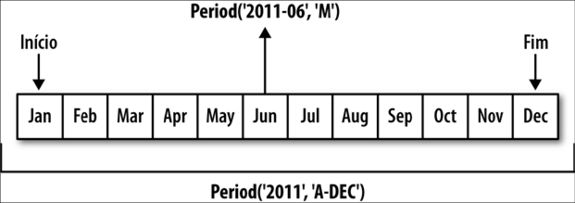


Quando você estiver convertendo de uma frequência alta para uma
frequência baixa, o pandas determinará o superperíodo dependendo
do local a que o subperíodo “pertença”. Por exemplo, em uma
frequência *A-JUN*, o mês *Aug-2007* na verdade faz parte do período
*2008*:

In [144]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [145]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Objetos *PeriodIndex* ou séries temporais completas podem ser
convertidos, de modo semelhante, com a mesma semântica:

In [146]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [147]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.080504
2007    0.204614
2008    0.319639
2009    1.978636
Freq: A-DEC, dtype: float64

In [148]:
ts.asfreq('M', how='start')

2006-01    0.080504
2007-01    0.204614
2008-01    0.319639
2009-01    1.978636
Freq: M, dtype: float64

Nesse caso, os períodos anuais são substituídos por períodos
mensais correspondentes ao primeiro mês que se enquadrar em
cada período anual. Se, por outro lado, quiséssemos o último dia útil
de cada ano, poderíamos utilizar a frequência 'B' e informar que
queremos o final do período:

In [149]:
ts.asfreq('B', how='end')

2006-12-29    0.080504
2007-12-31    0.204614
2008-12-31    0.319639
2009-12-31    1.978636
Freq: B, dtype: float64

### Frequências de período trimestrais

Dados trimestrais são padrões em contabilidade, finanças e em
outras áreas. Boa parte dos dados trimestrais são informados em
relação ao *final de um ano fiscal*, geralmente o último dia do calendário
ou o último dia útil de um dos doze meses do ano. Assim, o período
**2012Q4** tem um significado diferente, dependendo do final do ano
fiscal. O pandas aceita todas as 12 possíveis frequências
trimestrais, de **Q-JAN** a **Q-DEC**:

In [150]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

No caso do ano fiscal que termine em janeiro, **2012Q4** se estende de
novembro a janeiro, o que pode ser verificado fazendo a sua
conversão para uma frequência diária. Veja a Figura Abaixo que
apresenta uma ilustração.


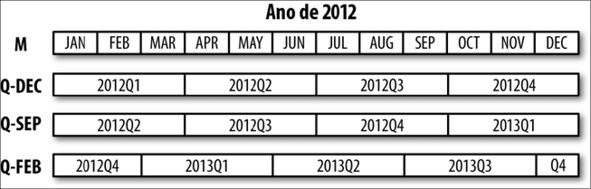

In [151]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [152]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

Assim, é possível fazer operações aritméticas com períodos
facilmente; por exemplo, para obter um timestamp às 16h horas do
penúltimo dia útil do trimestre, você poderia fazer o seguinte:

In [153]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [154]:
p4pm

Period('2012-01-30 16:00', 'T')

In [155]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

Podemos gerar intervalos trimestrais usando *period_range*. As
operações aritméticas são também idênticas:

In [156]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [157]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [158]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [159]:
ts.index = new_rng.to_timestamp()

In [160]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

###Convertendo timestamps para períodos (e vice-versa)

Objetos Series e DataFrame indexados por timestamps podem ser
convertidos para períodos usando o método *to_period*:

In [161]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [162]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.722338
2000-02-29   -0.750558
2000-03-31   -0.035977
Freq: M, dtype: float64

In [163]:
pts = ts.to_period()

In [164]:
pts

2000-01    0.722338
2000-02   -0.750558
2000-03   -0.035977
Freq: M, dtype: float64

Como os períodos se referem a intervalos de tempo que não se
sobrepõem, um timestamp só pode pertencer a um único período
para uma dada frequência. Embora, por padrão, a frequência do
novo *PeriodIndex* seja inferida a partir dos timestamps, você poderá
especificar qualquer frequência desejada. Também não há
problemas em ter períodos duplicados no resultado:

In [165]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [166]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.927714
2000-01-30    0.065627
2000-01-31    1.173547
2000-02-01    0.213113
2000-02-02    0.080948
2000-02-03    0.450381
Freq: D, dtype: float64

In [167]:
ts2.to_period('M')

2000-01   -0.927714
2000-01    0.065627
2000-01    1.173547
2000-02    0.213113
2000-02    0.080948
2000-02    0.450381
Freq: M, dtype: float64

Para fazer a conversão de volta para timestamps, utilize *to_timestamp*:

In [168]:
pts = ts2.to_period()
pts

2000-01-29   -0.927714
2000-01-30    0.065627
2000-01-31    1.173547
2000-02-01    0.213113
2000-02-02    0.080948
2000-02-03    0.450381
Freq: D, dtype: float64

In [169]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.927714
2000-01-30 23:59:59.999999999    0.065627
2000-01-31 23:59:59.999999999    1.173547
2000-02-01 23:59:59.999999999    0.213113
2000-02-02 23:59:59.999999999    0.080948
2000-02-03 23:59:59.999999999    0.450381
Freq: D, dtype: float64

### Criando um PeriodIndex a partir de arrays

Conjuntos de dados com frequência fixa às vezes são armazenados
com informações de intervalos de tempo espalhadas em várias
colunas. Por exemplo, no conjunto de dados de macroeconomia a
seguir, o ano e o trimestre estão em colunas diferentes:

In [170]:
path = '/content/drive/MyDrive/Análise de Dados/CSVs e TXTs/macrodata.csv'

In [171]:
data = pd.read_csv(path)

In [172]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [173]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [174]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

Ao passar esses arrays para *PeriodIndex* com uma frequência,
podemos combiná-los a fim de compor um índice para o DataFrame:

In [175]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [176]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [177]:
data.index = index

In [178]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [179]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Reamostragem e conversão de frequências

A *reamostragem* (resampling) refere-se ao processo de converter uma
série temporal de uma frequência para outra. Agregar dados de
frequências mais altas para frequências mais baixas é um processo
chamado *downsampling* (subamostragem), enquanto converter de
uma frequência mais baixa para uma frequência mais alta é
chamado de *upsampling* (sobreamostragem). Nem toda
reamostragem se enquadra em uma dessas categorias; por
exemplo, converter W-WED (semanalmente às quartas-feiras) para
*W-FRI* não é um upsampling nem um downsampling.

Os objetos do pandas oferecem um método *resample* – a função que
representa a força de trabalho para todas as conversões de
frequência. *resample* tem uma API semelhante a *groupby*; chame
*resample* para agrupar os dados e, em seguida, chame uma função
de agregação:

In [180]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [181]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [182]:
ts

2000-01-01   -1.252400
2000-01-02    2.825937
2000-01-03   -0.287556
2000-01-04    1.666333
2000-01-05   -1.059938
                ...   
2000-04-05   -1.642295
2000-04-06   -0.744563
2000-04-07    0.507623
2000-04-08   -0.429595
2000-04-09    0.740050
Freq: D, Length: 100, dtype: float64

In [183]:
ts.resample('M').mean()

2000-01-31    0.009313
2000-02-29    0.123970
2000-03-31    0.224460
2000-04-30   -0.832525
Freq: M, dtype: float64

In [184]:
ts.resample('M', kind='period').mean()

2000-01    0.009313
2000-02    0.123970
2000-03    0.224460
2000-04   -0.832525
Freq: M, dtype: float64

*resample* é um método flexível e de alto desempenho, e pode ser
utilizado para processar séries temporais bem grandes. Os
exemplos nas próximas seções mostram sua semântica e seu uso.
A Tabela Abaixo resume algumas de suas opções.

Tabela Abaixo – Argumentos do método resample

Argumento | Descrição
----------|----------------
**freq** | String ou DateOffset indicando a frequência de reamostragem
|desejada (por exemplo, 'M', '5min' ou Second(15))
**axis** | Eixo para a reamostragem; o default é axis=0
**fill_method** | Como interpolar em um upsampling, como em 'ffill' ou 'bfill'; por
|padrão, não faz nenhuma interpolação
**closed** | Em um downsampling, a extremidade de cada intervalo que está
|fechada (inclusive), 'right' ou 'left'
**label** | No downsampling, como rotular o resultado da agregação, com a
|fronteira de compartimento (bin) 'right' ou 'left' (por exemplo, o
|intervalo de cinco minutos de 9:30 a 9:35 poderia ser chamado de
|9:30 ou 9:35)
**loffset** | Ajuste de tempo para os rótulos de compartimentos, por exemplo,
|'-1s' / Second(-1) para deslocar os rótulos das agregações para um
|segundo mais cedo
**limit** | Em preenchimentos para a frente (forward) ou para trás (backward),
|é o número máximo de períodos a serem preenchidos
**kind** | Agrega para períodos ('period') ou timestamps ('timestamp'); o
|default é o tipo de índice da série temporal
**convention** | Ao reamostrar períodos, é a convenção ('start' ou 'end') para
|converter o período de baixa frequência para alta frequência; o
|default é 'end'

### Downsampling

Fazer uma agregação de dados para uma frequência regular e mais baixa é uma tarefa bem comum em séries temporais. Os dados que
você estiver agregando não precisam ter frequências fixas; a
frequência desejada define as *fronteiras dos compartimentos* (bin edges)
usadas para fatiar as séries temporais em partes para a agregação.
Por exemplo, para uma conversão em uma frequência mensal, *'M'*
ou *'BM'* , você deve dividir os dados em intervalos de um mês.
Dizemos que cada intervalo é *meio aberto* (half-open); um ponto de
dado só pode pertencer a um intervalo, e a união dos intervalos
compõe o período de tempo total. Há dois aspectos em que
devemos pensar quando usamos *resample* para fazer um
downsampling dos dados:

 - qual é o lado de cada intervalo que está *fechado*;
 - como atribuir rótulos a cada compartimento de agregação, seja com o início do intervalo ou com o fim.

Para ilustrar, vamos observar alguns dados de um minuto:

In [185]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [186]:
ts = pd.Series(np.arange(12), index=rng)

In [187]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suponha que você quisesse agregar esses dados em porções de
cinco minutos ou em *barras*, tomando a soma de cada grupo:

In [188]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

A frequência que você especificar define as fronteiras dos
compartimentos em incrementos de cinco minutos. Por padrão, a
fronteira *esquerda* do compartimento é inclusiva, portanto o valor *00:00*
está incluído no intervalo de *00:00* a *00:05*. Passar *closed='right'* altera
o intervalo para que seja fechado à direita:

In [189]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

A série temporal resultante recebe rótulos com base nos timestamps
do lado esquerdo de cada compartimento. Ao passar *label='right'*,
podemos atribuir rótulos a eles com a fronteira direita do
compartimento:

In [190]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

Veja a Figura Abaixo que apresenta uma ilustração dos dados com
frequência de minuto, sujeitos a uma reamostragem para uma
frequência de cinco minutos.

<div align="center">

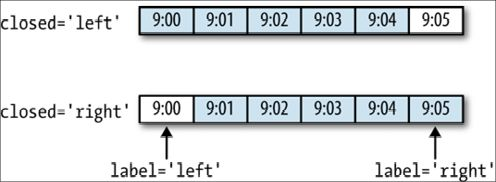

</div>

Por fim, talvez você queira deslocar o índice dos resultados de certo
valor, por exemplo, subtraindo um segundo da fronteira esquerda a
fim de deixar mais claro a qual intervalo o timestamp se refere. Para
isso, passe um offset na forma de string ou de data para *loffset*:

In [191]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

Você também poderia ter obtido o efeito de *loffset* se chamasse o
método *shift* no resultado, sem o *loffset*.

### Reamostragem OHLC (Open-High-Low-Close)

Na área financeira, uma forma conhecida de fazer uma agregação
em uma série temporal é calcular quatro valores para cada bucket: o
primeiro (open, isto é, de abertura), o último (close, isto é, de
fechamento), o máximo (high) e o mínimo (low). Ao usar a função de
agregação *ohlc*, você obterá um DataFrame com colunas contendo
essas quatro agregações, que são calculadas eficazmente em uma
única varredura dos dados:

In [192]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling e interpolação

Ao fazer a conversão de uma frequência baixa para uma frequência
mais alta, nenhuma agregação será necessária. Vamos considerar
um DataFrame com alguns dados semanais:

In [193]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [194]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.993303,1.488748,-1.002819,0.503472
2000-01-12,-1.109734,-0.532326,1.817001,1.385107


Ao usar uma função de agregação com esses dados, há apenas um
valor por grupo, e valores ausentes resultam em lacunas. Usamos o
método *asfreq* para converter para a frequência mais alta, sem
qualquer agregação:

In [195]:
df_daily = frame.resample('D').asfreq()

In [196]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.993303,1.488748,-1.002819,0.503472
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.109734,-0.532326,1.817001,1.385107


Suponha que você quisesse fazer um preenchimento para a frente
de cada valor semanal nos dias diferentes de quarta-feira. Os
mesmos métodos de preenchimento ou de interpolação disponíveisnos métodos *fillna* e *reindex* estão disponíveis para a reamostragem:

In [197]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.993303,1.488748,-1.002819,0.503472
2000-01-06,-1.993303,1.488748,-1.002819,0.503472
2000-01-07,-1.993303,1.488748,-1.002819,0.503472
2000-01-08,-1.993303,1.488748,-1.002819,0.503472
2000-01-09,-1.993303,1.488748,-1.002819,0.503472
2000-01-10,-1.993303,1.488748,-1.002819,0.503472
2000-01-11,-1.993303,1.488748,-1.002819,0.503472
2000-01-12,-1.109734,-0.532326,1.817001,1.385107


De modo semelhante, você pode optar por preencher somente certo
número de períodos para a frente a fim de limitar até que ponto deve
continuar usando o valor observado:

In [198]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.993303,1.488748,-1.002819,0.503472
2000-01-06,-1.993303,1.488748,-1.002819,0.503472
2000-01-07,-1.993303,1.488748,-1.002819,0.503472
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.109734,-0.532326,1.817001,1.385107


Observe que o novo índice de datas não se sobrepõe de modo
algum com o antigo:

In [199]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.993303,1.488748,-1.002819,0.503472
2000-01-13,-1.109734,-0.532326,1.817001,1.385107


###Reamostragem com períodos

Fazer uma reamostragem de dados indexados por períodos é
semelhante a timestamps:

In [200]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [201]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.468080,-0.116950,-1.616113,0.032579
2000-02,1.038668,-0.222479,-0.012033,0.396364
2000-03,1.189033,-1.152510,1.033128,-0.723192
2000-04,0.107265,0.806047,-0.567777,-0.579956
2000-05,-0.830482,1.449823,-0.904297,0.391115


In [202]:
annual_frame = frame.resample('A-DEC').mean()

In [203]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.17472,0.209081,-0.261881,-0.153919
2001,-0.02194,0.112360,-0.009318,0.241581


Fazer um upsampling é uma tarefa com mais nuances, pois você
deve tomar uma decisão sobre em qual extremidade do intervalo de
tempo na nova frequência devem ser colocados os valores antes da
reamostragem, como no método *asfreq*. O default do argumento
*convention* é *'start'*, mas também pode ser *'end'*:

In [204]:
# Q-DEC: trimenstral, com o ano terminado em dezembro
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.17472,0.209081,-0.261881,-0.153919
2000Q2,0.17472,0.209081,-0.261881,-0.153919
2000Q3,0.17472,0.209081,-0.261881,-0.153919
2000Q4,0.17472,0.209081,-0.261881,-0.153919
2001Q1,-0.02194,0.112360,-0.009318,0.241581
2001Q2,-0.02194,0.112360,-0.009318,0.241581
2001Q3,-0.02194,0.112360,-0.009318,0.241581
2001Q4,-0.02194,0.112360,-0.009318,0.241581


In [205]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.17472,0.209081,-0.261881,-0.153919
2001Q1,0.17472,0.209081,-0.261881,-0.153919
2001Q2,0.17472,0.209081,-0.261881,-0.153919
2001Q3,0.17472,0.209081,-0.261881,-0.153919
2001Q4,-0.02194,0.112360,-0.009318,0.241581


Como os períodos se referem a intervalos de tempo, as regras
sobre upsampling e downsampling são mais rígidas:

- No downsampling, a frequência-alvo deve ser um *subperíodo* da
frequência original.

- No upsampling, a frequência-alvo deve ser um *superperíodo* da
frequência original.

Se essas regras não forem satisfeitas, uma exceção será lançada.
Isso afeta principalmente as frequências trimestrais, anuais e
semanais; por exemplo, os intervalos de tempo definidos por *Q-MAR*
só se alinharão com *A-MAR*, *A-JUN*, *A-SEP* e *A-DEC*:

In [206]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.17472,0.209081,-0.261881,-0.153919
2001Q1,0.17472,0.209081,-0.261881,-0.153919
2001Q2,0.17472,0.209081,-0.261881,-0.153919
2001Q3,0.17472,0.209081,-0.261881,-0.153919
2001Q4,-0.02194,0.112360,-0.009318,0.241581
2002Q1,-0.02194,0.112360,-0.009318,0.241581
2002Q2,-0.02194,0.112360,-0.009318,0.241581
2002Q3,-0.02194,0.112360,-0.009318,0.241581


### Funções de janela móvel

Uma classe importante de transformações de array usada em
operações de séries temporais são as estatísticas e outras funções
avaliadas em uma janela deslizante ou com pesos
exponencialmente decrescentes. Isso pode ser útil para suavizarruídos ou dados com lacunas. Chamo-as de *funções de janela móvel*
(moving window functions), apesar de incluírem funções sem uma
janela de tamanho fixo, como a média móvel exponencialmente
ponderada. Assim como outras funções estatísticas, essas também
excluem automaticamente os dados ausentes.

Antes de explorar esse assunto com mais detalhes, podemos
carregar alguns dados de séries temporais e fazer uma
reamostragem deles para a frequência de dias úteis:

In [207]:
path = '/content/drive/MyDrive/Análise de Dados/CSVs e TXTs/stock_px_2.csv'

In [208]:
close_px_all = pd.read_csv(path, parse_dates=True, index_col=0)

In [209]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [210]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [211]:
close_px = close_px.resample('B').ffill()

Apresentarei agora o operador *rolling*, que se comporta de modo
semelhante a *resample* e a *groupby*. Ele pode ser chamado em uma
Series ou um DataFrame, junto com uma *window* (expressa como um
número de períodos; veja a Figura Abaixo que apresenta a plotagem
gerada):

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
sns.set()

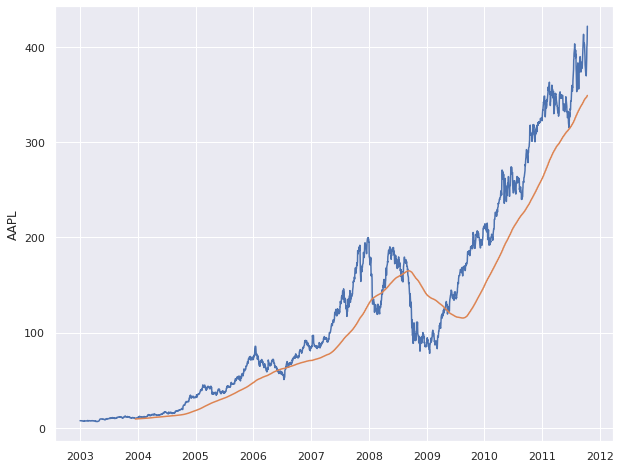

In [214]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=close_px.AAPL)
sns.lineplot(data=close_px.AAPL.rolling(250).mean())
plt.show()

<div align="center">
<h3>
<i>Preço da Apple com média móvel de 250 dias.</i>
</h3>
</div>

A expressão *rolling(250)* é semelhante em comportamento a *groupby*,
mas, em vez de agrupar, ela cria um objeto que permite
agrupamentos em uma janela deslizante de 250 dias. Assim, nesse
exemplo, temos a média da janela móvel de 250 dias do preço das
ações da Apple.

Por padrão, as funções de rolagem exigem que todos os valores da
janela sejam diferentes de NA. Esse comportamento pode ser
alterado para levar em consideração dados ausentes e, em
particular, o fato de que você terá menos que *window* períodos de
dados no início da série temporal:

In [215]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [216]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

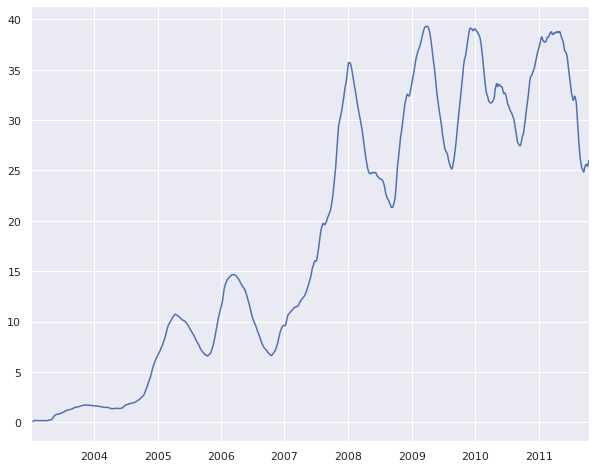

In [217]:
appl_std250.plot(figsize=(10,8))
plt.show()

<div align="center">
<h3>
<i>Desvio-padrão do retorno diário de 250 dias da Apple.</i>
</h3>
</div>

Para calcular uma *média de janela em expansão* (expanding window
mean), utilize o operador *expanding* no lugar de *rolling*. A média de
expansão inicia a janela de tempo no começo da série temporal e
aumenta o tamanho da janela até que ela englobe toda a série. Uma
média de janela em expansão na série temporal *apple_std250* tem o
seguinte aspecto:

In [218]:
expanding_mean = appl_std250.expanding().mean()

In [219]:
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

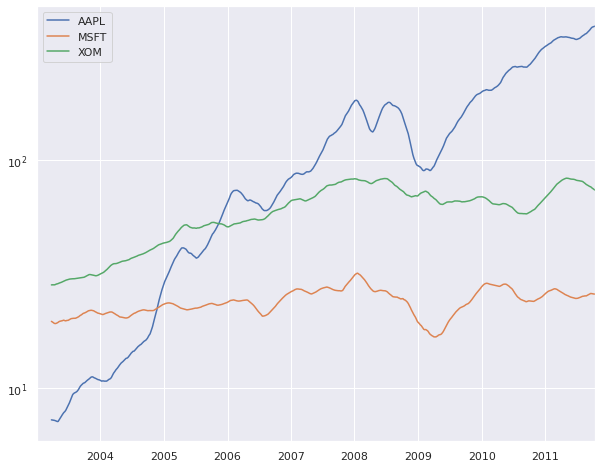

In [220]:
close_px.rolling(60).mean().plot(logy=True, figsize=(10,8))
plt.show()

<div align="center">
<h3>
<i>Preços das ações em média móvel de 60 dias (log eixo y).</i>
</h3>
</div>

A função *rolling* também aceita uma string informando um offset de
tempo de tamanho fixo em vez de um número definido de períodos.
Usar essa notação pode ser conveniente em séries temporais
irregulares. Essas são as mesmas strings que podemos passar para
*resample*. Por exemplo, poderíamos calcular uma média móvel de 20
dias assim:

In [222]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Funções exponencialmente ponderadas

Uma alternativa ao uso de um tamanho estático de janela com
observações igualmente ponderadas consiste em especificar um
*fator de decaimento* (decay factor) constante para atribuir mais peso às
observações mais recentes. Há algumas maneiras de especificar o
fator de decaimento. Uma opção popular é usar um *span*, que deixa
o resultado comparável a uma função simples de janela móvel com
o tamanho da janela igual ao span.

Como uma estatística exponencialmente ponderada atribui mais
peso a observações mais recentes, ela se “adapta” mais
rapidamente às mudanças, se comparada à versão igualmente
ponderada.

O pandas tem um operador *ewm* para ser usado em conjunto com
*rolling* e *expanding*. Eis um exemplo que compara uma média móvel de
60 dias do preço da ação da Apple com uma média móvel
exponencialmente ponderada usando *span=60*:

In [223]:
aapl_px = close_px.AAPL['2006':'2007']

In [224]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [233]:
ma60

2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06           NaN
                 ...    
2007-12-25    181.520333
2007-12-26    182.615000
2007-12-27    183.757333
2007-12-28    184.872000
2007-12-31    186.009667
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [225]:
ewma60 = aapl_px.ewm(span=30).mean()

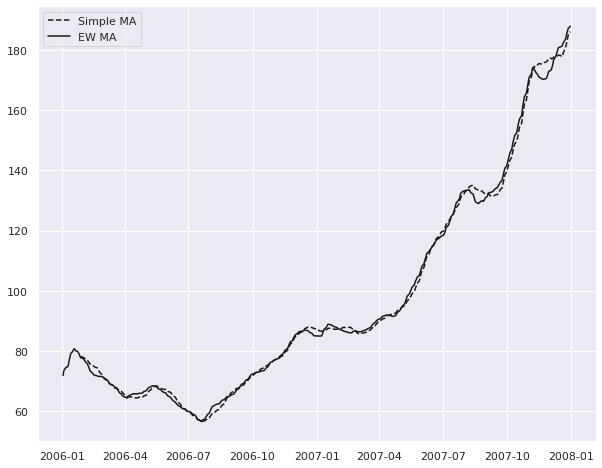

In [250]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ma60.index, ma60.values, 'k--', label='Simple MA')
ax.plot(ewma60.index, ewma60.values, 'k-', label='EW MA')
plt.legend()
plt.show()

<div align="center">
<h3>
<i>Média móvel simples versus exponencialmente ponderada.</i>
</h3>
</div>

### Funções de janela móvel binárias

Alguns operadores estatísticos, como correlação e covariância,
precisam atuar em duas séries temporais. Como exemplo, os
analistas financeiros muitas vezes estão interessados na correlação
entre uma ação e um índice de benchmark, como o S&P 500. Para
observar esse cenário, inicialmente calcularemos a mudança
percentual para todas as séries temporais de nosso interesse:

In [251]:
spx_px = close_px_all['SPX']

In [252]:
spx_rets = spx_px.pct_change()

In [253]:
returns = close_px.pct_change()

A função de agregação *corr*, depois que chamamos *rolling*, pode
então calcular a correlação móvel com *spx_rets*:

In [254]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

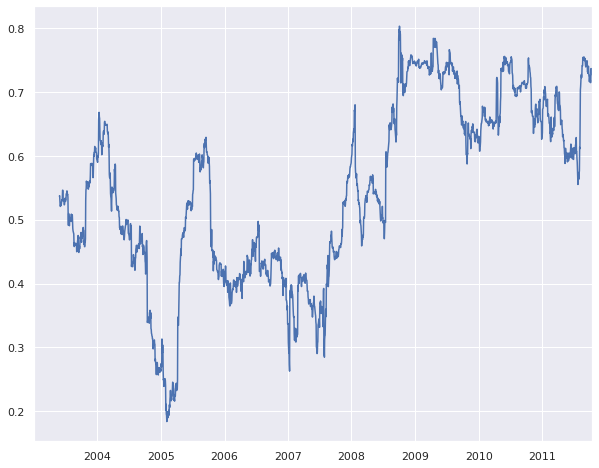

In [256]:
corr.plot(figsize=(10,8))
plt.show()

<div align="center">
<h3>
<i>Correlação entre o retorno de AAPL e o S&P 500 em seis meses.</i>
</h3>
</div>

Suponha que quiséssemos calcular a correlação entre o índice S&P
500 com várias ações de uma só vez. Escrever um laço e criar um
novo DataFrame seria fácil, mas poderia se tornar repetitivo; desse
modo, se você passar uma Series e um DataFrame, uma função
como *rolling_corr* calculará a correlação entre a Series (*spx_rets*, nesse
caso) e cada coluna do DataFrame:

In [257]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

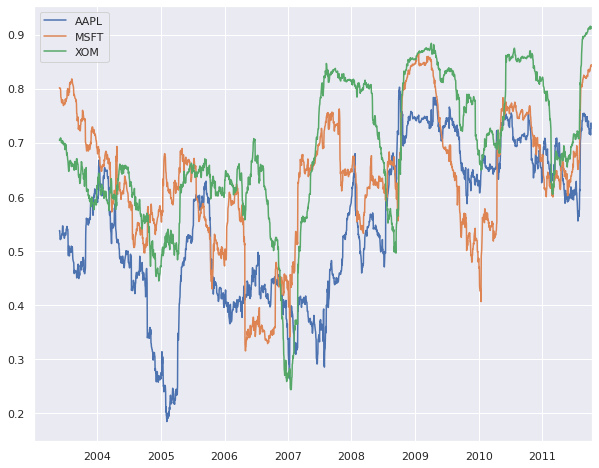

In [258]:
corr.plot(figsize=(10,8))
plt.show()

<div align="center">
<h3>
<i>Correlações de retorno com S&P 500 em seis meses.</i>
</h3>
</div>

### Funções de janela móvel definidas pelo usuário

O método *apply* em *rolling* e métodos relacionados oferecem um meio
de aplicar uma função de array criada por você mesmo em uma
janela móvel. O único requisito é que a função gere um único valor
(uma redução) a partir de cada parte do array. Por exemplo, embora
seja possível calcular quantis da amostra usando *rolling(...).quantile(q)*,
podemos estar interessados na classificação de percentil de um
determinado valor na amostra. A função *scipy.stats.percentileofscore* faz
exatamente isso.

In [259]:
from scipy.stats import percentileofscore

In [260]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [261]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

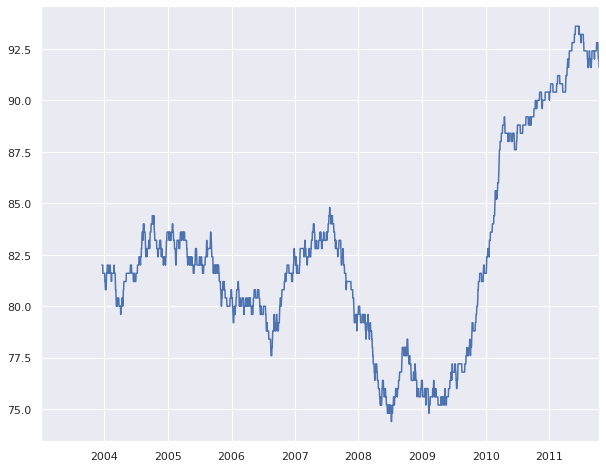

In [262]:
result.plot(figsize=(10,8))
plt.show()